### Step 1: Data Preparation

In [1]:
import pandas as pd

In [8]:
sms_df = pd.read_csv('smsspamcollection.csv',header=None,names=['class','sms'])

In [9]:
sms_df.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
sms_df.shape

(5572, 2)

In [12]:
df = sms_df['class'].value_counts()

In [14]:
df

ham     4825
spam     747
Name: class, dtype: int64

In [16]:
df[1]

747

In [27]:
ham = sms_df[sms_df['class']=='ham'].shape[0]

In [28]:
spam = sms_df[sms_df['class']=='spam'].shape[0]

In [30]:
print('spam rate is about {0}%'.format(round(spam*100/(spam+ham)),2))

spam rate is about 13%


In [31]:
sms_df['label'] = sms_df['class'].map({'ham':0,'spam':1})

In [32]:
sms_df.head()

,class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [33]:
sms_df = sms_df.drop('class',axis=1)
sms_df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [34]:
# Populating X and y
X = sms_df['sms']
y = sms_df['label']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [35]:
# Train Test Split. By default it does 75-25 distribution
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [38]:
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [39]:
# Vectorizationa and stop word removal
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')

In [41]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [42]:
vec.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6674,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6666,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6615,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6853,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7128,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6877,
 'wiskey': 7013,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [47]:
len(vec.vocabulary_.keys())

7204

In [49]:
# Transforming train and test dataset into a Document-term sparse matrix
X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)

In [50]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6674)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7135)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


### Step 2: Model Building and Evaluation

In [52]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Fit
mnb.fit(X_train_transformed,y_train)

# Predict
y_pred_class = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [53]:
mnb

MultinomialNB()

In [54]:
# Model Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9877961234745154

In [56]:
# Confussion Matrix
metrics.confusion_matrix(y_test,y_pred_class)

array([[1201,    7],
       [  10,  175]], dtype=int64)

In [57]:
cm = metrics.confusion_matrix(y_test,y_pred_class)

print(cm)
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]


[[1201    7]
 [  10  175]]


In [62]:
# Specificity
print(TN/(TN+FP))

0.9942052980132451


In [59]:
# Sensitivity
print(TP/(TP+FN))

0.9459459459459459


In [68]:
# False Positive Rate
print(FP/(FP+TN))

0.005794701986754967


In [64]:
# Precision
print(TP/(TP+FP))
print(metrics.precision_score(y_test,y_pred_class))

0.9615384615384616
0.9615384615384616


In [66]:
# Recall
print(TP/(TP+FN))
print(metrics.recall_score(y_test,y_pred_class))

0.9459459459459459
0.9459459459459459


In [67]:
# F1 Score
print(metrics.f1_score(y_test,y_pred_class))

0.9536784741144414


In [69]:
# Creating a ROC Curve
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [89]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])
roc_auc = auc(fpr,tpr)

In [90]:
print(roc_auc)

0.9921872203329157


In [93]:
d = {'FPR':fpr,'TPR':tpr,'THRESHOLD':thresholds}

In [94]:
df = pd.DataFrame(data=d)

In [95]:
df.head()

,FPR,TPR,THRESHOLD
0,0.0,0.000000,2.0
1,0.0,0.308108,1.0
2,0.0,0.313514,1.0
3,0.0,0.335135,1.0
4,0.0,0.340541,1.0


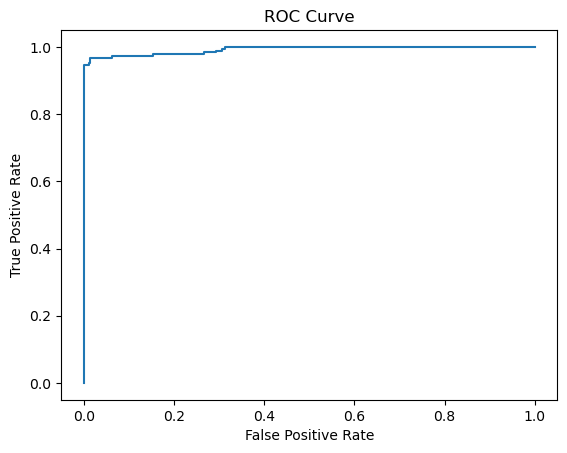

In [96]:
# Plotting ROC Curve
%matplotlib inline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.show()

### BernouliNB

In [97]:
from sklearn.naive_bayes import BernoulliNB

In [98]:
bnb = BernoulliNB()

# Fit
bnb.fit(X_train_transformed,y_train)

# Predict
y_pred_class = bnb.predict(X_test_transformed)
y_pred_proba = bnb.predict_proba(X_test_transformed)

In [99]:
metrics.accuracy_score(y_test,y_pred_class)

0.9770279971284996

In [100]:
cm2 = metrics.confusion_matrix(y_test,y_pred_class)

print(cm2)
TN = cm2[0,0]
FP = cm2[0,1]
FN = cm2[1,0]
TP = cm2[1,1]

[[1207    1]
 [  31  154]]


In [105]:
print("Precision Score:",metrics.precision_score(y_test,y_pred_class))
print("Recall Score:",metrics.recall_score(y_test,y_pred_class))
print("F1 Score:",metrics.f1_score(y_test,y_pred_class))

Precision Score: 0.9935483870967742
Recall Score: 0.8324324324324325
F1 Score: 0.9058823529411765


In [112]:
text = ['Coffee Tea Soup Coffee Coffee','Coffee is hot and so is Soup and Tea','Espresso is a hot Coffee and not a Tea','Coffee is neither Tea nor Soup','Sprite Pepsi Cold Coffee and cold Tea']
label = ['Hot','Hot','Hot','Hot','Cold']

In [113]:
df = pd.DataFrame({'text':text,'label': label})

In [114]:
df.head()

,text,label
0,Coffee Tea Soup Coffee Coffee,Hot
1,Coffee is hot and so is Soup and Tea,Hot
2,Espresso is a hot Coffee and not a Tea,Hot
3,Coffee is neither Tea nor Soup,Hot
4,Sprite Pepsi Cold Coffee and cold Tea,Cold


In [115]:
X = df['text']
y = df['label']
print(X.shape)
print(y.shape)

(5,)
(5,)


In [116]:
vec.fit(X)

CountVectorizer(stop_words='english')

In [117]:
vec.vocabulary_

{'coffee': 0,
 'tea': 7,
 'soup': 5,
 'hot': 3,
 'espresso': 2,
 'sprite': 6,
 'pepsi': 4,
 'cold': 1}

In [118]:
X_transformed = vec.transform(X)

In [120]:
print(X_transformed)

  (0, 0)	3
  (0, 5)	1
  (0, 7)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (1, 7)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (2, 7)	1
  (3, 0)	1
  (3, 5)	1
  (3, 7)	1
  (4, 0)	1
  (4, 1)	2
  (4, 4)	1
  (4, 6)	1
  (4, 7)	1
